In [ ]:
!pip install tensorflow==2.17.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 827.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 626.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from PIL import Image
import glob
import numpy as np

imagen =[]
imaged=[]



#image_dir = 'D:\\ds\\dl\\cnn\\license_plate\\data\\license_plates_detection_train'
image_dir='//content//drive//MyDrive//license_plate//data//license_plates_detection_train'
# Use glob to get all the image file paths
image_paths = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))
for i in image_paths:
    img= Image.open(i)
    imagen.append(os.path.basename(i))
    imaged.append(img.size)

In [ ]:
len(imaged)

900

In [ ]:
width=[]
height=[]
for i in range (0,len(imaged)):
    width.append(imaged[i][0])
    height.append(imaged[i][1])


In [ ]:
len(width),len(height)

(900, 900)

In [ ]:
import pandas as pd
df = pd.DataFrame()

df['img_id']=imagen
df['width']=width
df['height']=height
df

,img_id,width,height
0,1.jpg,850,477
1,10.jpg,639,479
2,100.jpg,729,547
3,101.jpg,850,477
4,102.jpg,409,547
...,...,...,...
895,95.jpg,729,547
896,96.jpg,729,547
897,97.jpg,850,455
898,98.jpg,663,547


In [ ]:
dftrain= pd.read_csv('//content//drive//MyDrive//license_plate//data//Licplatesdetection_train.csv')
dftrain

,img_id,ymin,xmin,ymax,xmax
0,1.jpg,276,94,326,169
1,10.jpg,311,395,344,444
2,100.jpg,406,263,450,434
3,101.jpg,283,363,315,494
4,102.jpg,139,42,280,222
...,...,...,...,...,...
895,95.jpg,426,34,508,140
896,96.jpg,356,378,457,548
897,97.jpg,229,149,283,217
898,98.jpg,272,252,300,383


In [ ]:
dftrain['width']=df['width']
dftrain['height']=df['height']
dftrain

,img_id,ymin,xmin,ymax,xmax,width,height
0,1.jpg,276,94,326,169,850,477
1,10.jpg,311,395,344,444,639,479
2,100.jpg,406,263,450,434,729,547
3,101.jpg,283,363,315,494,850,477
4,102.jpg,139,42,280,222,409,547
...,...,...,...,...,...,...,...
895,95.jpg,426,34,508,140,729,547
896,96.jpg,356,378,457,548,729,547
897,97.jpg,229,149,283,217,850,455
898,98.jpg,272,252,300,383,663,547


In [ ]:
# resizing the images based on the average width and average height, to minize the distortion and loss of data
avgw = dftrain['width'].mean()
avgh = dftrain['height'].mean()
avgw,avgh

(609.6322222222223, 512.3222222222222)

In [ ]:
import numpy as np
avgw=int(np.ceil(avgw))
avgh=int(np.ceil(avgh))
avgw,avgh

(610, 513)

In [ ]:
x_scale= avgw/dftrain['width']
y_scale=avgh/dftrain['height']

In [ ]:
dftt = pd.DataFrame()
dftt['img_id']=dftrain['img_id']
dftt['x_min'] = dftrain['xmin'] * x_scale
dftt['y_min'] = dftrain['ymin'] * y_scale
dftt['x_max'] = dftrain['xmax'] * x_scale
dftt['y_max'] = dftrain['ymax'] * y_scale
dftt

,img_id,x_min,y_min,x_max,y_max
0,1.jpg,67.458824,296.830189,121.282353,350.603774
1,10.jpg,377.073552,333.075157,423.849765,368.417537
2,100.jpg,220.068587,380.764168,363.155007,422.029250
3,101.jpg,260.505882,304.358491,354.517647,338.773585
4,102.jpg,62.640587,130.360146,331.100244,262.595978
...,...,...,...,...,...
895,95.jpg,28.449931,399.521024,117.146776,476.424132
896,96.jpg,316.296296,333.872029,458.545953,428.594150
897,97.jpg,106.929412,258.191209,155.729412,319.074725
898,98.jpg,231.855204,255.093236,352.383107,281.352834


In [ ]:
images=[]
image_dir = '//content//drive//MyDrive//license_plate//data//license_plates_detection_train'

# Use glob to get all the image file paths
image_paths = sorted(glob.glob(os.path.join(image_dir, '*.jpg')))
for i in image_paths:
    img= Image.open(i)
    size = img.size
    img = img.resize((avgw,avgh))
    print(os.path.basename(i))
    print("from ",size," to ",img.size)
    img = img.convert('RGB')
    img_array = np.array(img)
    images.append(img_array)

1.jpg
from  (850, 477)  to  (610, 513)
10.jpg
from  (639, 479)  to  (610, 513)
100.jpg
from  (729, 547)  to  (610, 513)
101.jpg
from  (850, 477)  to  (610, 513)
102.jpg
from  (409, 547)  to  (610, 513)
103.jpg
from  (729, 547)  to  (610, 513)
104.jpg
from  (729, 547)  to  (610, 513)
105.jpg
from  (842, 476)  to  (610, 513)
106.jpg
from  (410, 547)  to  (610, 513)
107.jpg
from  (732, 547)  to  (610, 513)
108.jpg
from  (729, 547)  to  (610, 513)
109.jpg
from  (479, 359)  to  (610, 513)
11.jpg
from  (821, 547)  to  (610, 513)
110.jpg
from  (850, 510)  to  (610, 513)
111.jpg
from  (850, 477)  to  (610, 513)
112.jpg
from  (729, 547)  to  (610, 513)
113.jpg
from  (850, 477)  to  (610, 513)
114.jpg
from  (850, 477)  to  (610, 513)
115.jpg
from  (410, 547)  to  (610, 513)
116.jpg
from  (729, 547)  to  (610, 513)
117.jpg
from  (729, 547)  to  (610, 513)
118.jpg
from  (729, 546)  to  (610, 513)
119.jpg
from  (729, 547)  to  (610, 513)
12.jpg
from  (850, 477)  to  (610, 513)
120.jpg
from  (639, 4

In [ ]:
images = np.array(images)
images.shape

(900, 513, 610, 3)

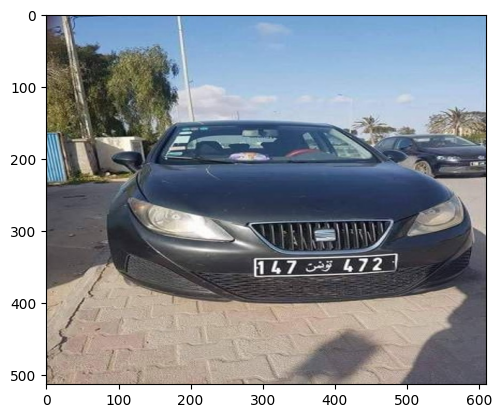

In [ ]:
import matplotlib.pyplot as plt
import random
i = random.randint(0,900)
plt.imshow(images[i])

In [ ]:
# as observed there is no much distortion in the images after resizing the images
# If there is much distortion , then we can use padding

In [ ]:
dftt

,img_id,x_min,y_min,x_max,y_max
0,1.jpg,67.458824,296.830189,121.282353,350.603774
1,10.jpg,377.073552,333.075157,423.849765,368.417537
2,100.jpg,220.068587,380.764168,363.155007,422.029250
3,101.jpg,260.505882,304.358491,354.517647,338.773585
4,102.jpg,62.640587,130.360146,331.100244,262.595978
...,...,...,...,...,...
895,95.jpg,28.449931,399.521024,117.146776,476.424132
896,96.jpg,316.296296,333.872029,458.545953,428.594150
897,97.jpg,106.929412,258.191209,155.729412,319.074725
898,98.jpg,231.855204,255.093236,352.383107,281.352834


In [ ]:
# normalize the target data to make training more stable and improve convergance
dftt['x_min'] = dftt['x_min'] / avgw
dftt['y_min'] = dftt['y_min'] / avgh
dftt['x_max'] = dftt['x_max'] / avgw
dftt['y_max'] = dftt['y_max'] / avgh

In [ ]:
dftt

,img_id,x_min,y_min,x_max,y_max
0,1.jpg,0.110588,0.578616,0.198824,0.683438
1,10.jpg,0.618153,0.649269,0.694836,0.718163
2,100.jpg,0.360768,0.742230,0.595336,0.822669
3,101.jpg,0.427059,0.593291,0.581176,0.660377
4,102.jpg,0.102689,0.254113,0.542787,0.511883
...,...,...,...,...,...
895,95.jpg,0.046639,0.778793,0.192044,0.928702
896,96.jpg,0.518519,0.650823,0.751715,0.835466
897,97.jpg,0.175294,0.503297,0.255294,0.621978
898,98.jpg,0.380090,0.497258,0.577677,0.548446


In [ ]:
x=images
y=dftt.iloc[:,1:]

In [ ]:
len(x),len(y)

(900, 900)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42,shuffle=False)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(603, 513, 610, 3) (603, 4)
(297, 513, 610, 3) (297, 4)


In [ ]:
x_train.shape[1],x_train.shape[2],x_train.shape[3]

(513, 610, 3)

In [ ]:
# normalizing the pixel values of x_train and y_train for more consistency
x_train_n = x_train / 255.0
x_test_n = x_test / 255.0

In [ ]:
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error')  # MSE loss for regression tasks
"""

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization\nfrom tensorflow.keras.regularizers import l2\nfrom tensorflow.keras.optimizers import Adam\n\nmodel = Sequential()\nmodel.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3])))\nmodel.add(MaxPooling2D((2, 2)))\n\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(Dropout(0.2))\nmodel.add(MaxPooling2D((2, 2)))\n\nmodel.add(Flatten())\nmodel.add(Dense(16, activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(4, activation='sigmoid'))\n\nmodel.compile(optimizer='adam', loss='mean_squared_error')  # MSE loss for regression tasks\n"

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

base_model = ResNet50(input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]), include_top=False, weights='imagenet')

base_model.trainable = False # freeze the model


# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='drive/MyDrive/license_plate/model_checkpoint.keras',
    monitor='val_loss',  # Monitor validation loss to save the best model
    save_best_only=True,  # Save only the model with the best validation accuracy
    save_weights_only=False,  # Save the entire model, not just weights
    verbose=1 )

#custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(140, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(4, activation='sigmoid')
])
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.fit(x_train_n,y_train,epochs=10,batch_size=16,validation_data=(x_test_n,y_test),callbacks=[checkpoint_callback])

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.1096
Epoch 1: val_loss improved from inf to 0.01987, saving model to drive/MyDrive/license_plate/model_checkpoint.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - loss: 0.1090 - val_loss: 0.0199
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0253
Epoch 2: val_loss improved from 0.01987 to 0.01665, saving model to drive/MyDrive/license_plate/model_checkpoint.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - loss: 0.0253 - val_loss: 0.0166
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0225
Epoch 3: val_loss did not improve from 0.01665
38/38 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - loss: 0.0225 - val_loss: 0.0167
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0231
Epoch 4: val_loss improved from 0.01665 to 0.01657, saving model to drive/MyDrive/license_plate/model_checkpoint.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - loss: 0.0231 - val_loss: 0.0166
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - l

In [ ]:
model.fit(x_train_n,y_train,epochs=10,batch_size=16,validation_data=(x_test_n,y_test),callbacks=[checkpoint_callback])

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0209
Epoch 1: val_loss did not improve from 0.01570
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - loss: 0.0209 - val_loss: 0.0165
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0240
Epoch 2: val_loss did not improve from 0.01570
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - loss: 0.0240 - val_loss: 0.0164
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0226
Epoch 3: val_loss did not improve from 0.01570
38/38 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - loss: 0.0226 - val_loss: 0.0168
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0233
Epoch 4: val_loss did not improve from 0.01570
38/38 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - loss: 0.0233 - val_loss: 0.0158
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0226
Epoch 5: val_loss improved from 0.01570 to 0.01537, saving model to drive/MyDrive/license_plate/model_checkpoint.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - loss: 0.0226 - val_loss: 0.0154
Epoch 6/

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('drive/MyDrive/license_plate/model_checkpoint.keras')
#model_checkpoint 15 epochs, val_acc 0.015,batch_size 16 ,base model freezed
#model_checkpoint2 15+10 epochs, val_acc 0.008 , last 10 layers unfreezed in base model

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 17, 20, 2048)        │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 140)                 │         286,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 140)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             564 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,449,986 (93.27 MB)

 Trainable params: 287,424 (1.10 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 574,850 (2.19 MB)

In [ ]:

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

model.layers[0].trainable=True; # unfreezing all the layers
for layer in model.layers[0].layers[:-10]:
    layer.trainable = False  # Freeze all except the last 10 layers

model.layers[2].kernel_regularizer = regularizers.l2(0.02)

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),  # Lower learning rate
              loss='mean_squared_error')


In [ ]:
checkpoint_callback1 = ModelCheckpoint(
    filepath='drive/MyDrive/license_plate/model_checkpoint2.keras',
    monitor='val_loss',  # Monitor validation loss to save the best model
    save_best_only=True,  # Save only the model with the best validation accuracy
    save_weights_only=False,  # Save the entire model, not just weights
    verbose=1 )

In [ ]:
model.fit(x_train_n,y_train,epochs=10,batch_size=16,validation_data=(x_test_n,y_test),callbacks=[checkpoint_callback1])

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0125
Epoch 1: val_loss did not improve from 0.01289
38/38 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - loss: 0.0125 - val_loss: 0.0198
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0133
Epoch 2: val_loss did not improve from 0.01289
38/38 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - loss: 0.0132 - val_loss: 0.0182
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0125
Epoch 3: val_loss did not improve from 0.01289
38/38 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - loss: 0.0125 - val_loss: 0.0367
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0122
Epoch 4: val_loss did not improve from 0.01289
38/38 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - loss: 0.0122 - val_loss: 0.0154
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0112
Epoch 5: val_loss improved from 0.01289 to 0.00991, saving model to drive/MyDrive/license_plate/model_checkpoint2.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - loss: 0.0112 - val_loss: 0.0099
Epoch 6

In [ ]:
# more the layers we unfreeze , more the overfit the model becomes,
# so start with small and gradually increase

In [ ]:
# now we have completed our first step to recognize the numberplate from the car image,
# Next we will go for character recognision in the images

In [1]:
!pip install tensorflow==2.17.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
from PIL import Image
import glob
import os


imagesn=[]
imagenn=[]
image_dir2 = '//content//drive//MyDrive//license_plate//data//license_plates_recognition_train'

# Use glob to get all the image file paths
image_paths = sorted(glob.glob(os.path.join(image_dir2, '*.jpg')))
for i in image_paths:
  image = cv2.imread(i)
  new_width = 150
  new_height = 50
  imagenn.append(os.path.basename(i))
  img = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
  #image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  image=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_array = np.array(image)
  imagesn.append(img_array)

In [4]:
imagesn=np.array(imagesn)

In [5]:
imagesn.shape

(900, 50, 150)

array([[ 90,  78,  65, ..., 159, 160, 166],
       [102,  92,  81, ..., 168, 166, 165],
       [127, 119, 112, ..., 186, 178, 164],
       ...,
       [ 42,  85, 141, ...,  33,  30,  28],
       [ 46,  58,  75, ...,  41,  34,  29],
       [ 48,  46,  46, ...,  42,  34,  29]], dtype=uint8)
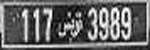

In [6]:
import random
j = random.randint(0,900)
imagesn[j]

In [7]:
import pandas as pd
dfn = pd.read_csv('//content//drive//MyDrive//license_plate//data//Licplatesrecognition_train.csv')

In [8]:
dfn

,img_id,text
0,0.jpg,117T3989
1,1.jpg,128T8086
2,10.jpg,94T3458
3,100.jpg,133T6719
4,101.jpg,68T5979
...,...,...
895,95.jpg,39T8707
896,96.jpg,92T589
897,97.jpg,180T706
898,98.jpg,87T7369


In [9]:
#imagenn

In [10]:
# preprocesing the pixels
imagesn = imagesn / 255.0


In [11]:
imagesn.shape

(900, 50, 150)

In [12]:
imagesn = np.expand_dims(imagesn, axis=-1)
imagesn.shape

(900, 50, 150, 1)

In [13]:
# preprocessing lables
# Mapping alphanumeric characters to integer indices
char_list = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
char_to_idx = {char: idx for idx, char in enumerate(char_list)}

def encode_text(text):
    return [char_to_idx[char] for char in text]
y1=[]
for i in dfn['text']:
  y1.append(encode_text(i))

In [14]:
y1[0]

[1, 1, 7, 29, 3, 9, 8, 9]

In [15]:
# padding the sequences to make all the sequences of same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = max([len(i) for i in y1])
y_padded = pad_sequences(y1, maxlen=max_length, padding='post')
y_padded

array([[ 1,  1,  7, ...,  9,  8,  9],
       [ 1,  2,  8, ...,  0,  8,  6],
       [ 9,  4, 29, ...,  5,  8,  0],
       ...,
       [ 1,  8,  0, ...,  0,  6,  0],
       [ 8,  7, 29, ...,  6,  9,  0],
       [ 1,  5,  9, ...,  8,  9,  4]], dtype=int32)

In [16]:
y_padded[0]

array([ 1,  1,  7, 29,  3,  9,  8,  9], dtype=int32)

In [17]:
y_padded=np.array(y_padded)

In [18]:
y_padded.shape

(900, 8)

In [19]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(imagesn,y_padded, test_size=0.33, random_state=42)

In [20]:
print(x_train1.shape,y_train1.shape)
print(x_test1.shape,y_test1.shape)

(603, 50, 150, 1) (603, 8)
(297, 50, 150, 1) (297, 8)


In [21]:
x_train1.shape[1],x_train1.shape[2],x_train1.shape[3]

(50, 150, 1)

In [22]:
y_train1.shape

(603, 8)

In [23]:
import tensorflow as tf
input_length = tf.fill([603, 1], tf.shape(y_train1)[1])
input_length.shape

TensorShape([603, 1])

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, Dense, LSTM, Bidirectional, TimeDistributed,Input, Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.regularizers import l2
import tensorflow as tf

num_classes = 37         # 26 letters + 10 digits + 1 EOS token
max_label_length = 8     # Maximum label length (padded)

input_shape = (x_train1.shape[1],x_train1.shape[2],x_train1.shape[3]) # Input shape (height, width, channels)


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #(batch_size, 25, 75, 32)


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #(batch_size,12,37,64)

model.add(Conv2D(100, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #(batch_size,6,18,100)
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #(batch_size,3,9,128)
model.add(Dropout(0.3))

#model.add(Flatten())
#features = int((12*37*32)/max_label_length)
#model.add(Reshape((-1,features)))  # Reshape to (batch_size, 8,features)


model.add(Reshape((3 * 9, 128))) # reshaping the 3d output of cnn to 2d input of lstm of (batch_size,timesteps,features)

model.add(LSTM(128,return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(62, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(TimeDistributed(Dense(num_classes, activation='softmax')))
#(batch_size, timesteps, 37)
model.summary()


def ctc_loss_fn(y_true, y_pred):
    batch_size = tf.shape(y_true)[0]
    input_length = tf.fill([batch_size, 1], tf.shape(y_pred)[1])
    label_length = tf.fill([batch_size, 1], tf.shape(y_true)[1])
    return K.ctc_batch_cost(y_true, y_pred, input_length, label_length)

model.compile(optimizer=Adam(learning_rate=0.001), loss=ctc_loss_fn)



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 50, 150, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_61               │ (None, 50, 150, 32)         │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 25, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 25, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_62               │ (None, 25, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 12, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 12, 37, 100)         │          57,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_63               │ (None, 12, 37, 100)         │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 6, 18, 100)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 6, 18, 100)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 6, 18, 128)          │         115,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_64               │ (None, 6, 18, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 3, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 3, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_9 (Reshape)                  │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 27, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_65               │ (None, 27, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 27, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 27, 128)             │         131,5

 Total params: 507,279 (1.94 MB)

 Trainable params: 505,995 (1.93 MB)

 Non-trainable params: 1,284 (5.02 KB)

In [60]:
"""Dense layer with TimeDistributed wraps each time step's output and applies a softmax activation to predict one of the 37 classes
(26 alphabets, 10 digits, and 1 blank). """

"Dense layer with TimeDistributed wraps each time step's output and applies a softmax activation to predict one of the 37 classes\n(26 alphabets, 10 digits, and 1 blank). "

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback2 = ModelCheckpoint(
    filepath='drive/MyDrive/license_plate/modelr2.keras',
    monitor='val_loss',  # Monitor validation loss to save the best model
    save_best_only=True,  # Save only the model with the best validation accuracy
    save_weights_only=False,  # Save the entire model, not just weights
    verbose=1 )

In [ ]:
history=model.fit(x_train1,y_train1,epochs=100,batch_size=16,validation_data=(x_test1,y_test1),callbacks=[checkpoint_callback2])

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 53.9804
Epoch 1: val_loss improved from inf to 51.86035, saving model to drive/MyDrive/license_plate/modelr2.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - loss: 53.6765 - val_loss: 51.8603
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 27.7292
Epoch 2: val_loss improved from 51.86035 to 48.67346, saving model to drive/MyDrive/license_plate/modelr2.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 27.6794 - val_loss: 48.6735
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 21.4553
Epoch 3: val_loss did not improve from 48.67346
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 21.4464 - val_loss: 54.6576
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 20.1128
Epoch 4: val_loss did not improve from 48.67346
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 20.1076 - val_loss: 54.9850
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 19.5367
Epoch 5: val_loss improved from 48.6

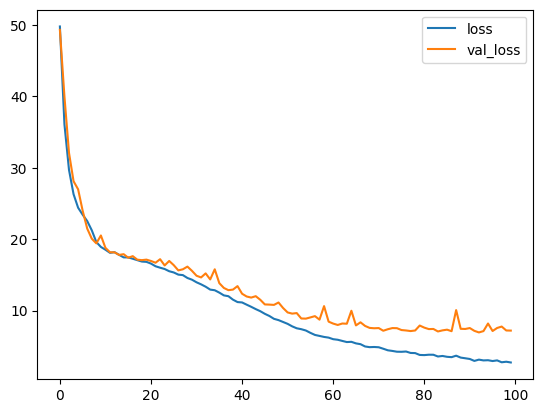

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
#model.save('drive/MyDrive/license_plate/modelr.keras')

In [ ]:
from tensorflow.keras.models import load_model
modelr = load_model('drive/MyDrive/license_plate/modelr.keras')
# modelr1 - loss: 3.1088 - val_loss: 6.9500 , 93 - epochs

In [ ]:
#history=model.fit(x_train1,y_train1,epochs=100,batch_size=16,validation_data=(x_test1,y_test1))

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5549 - loss: 1.3065 - val_accuracy: 0.4554 - val_loss: 1.7791
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5434 - loss: 1.3078 - val_accuracy: 0.4575 - val_loss: 1.7794
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5569 - loss: 1.3258 - val_accuracy: 0.4499 - val_loss: 1.8630
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5488 - loss: 1.3258 - val_accuracy: 0.4621 - val_loss: 1.7571
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5476 - loss: 1.3285 - val_accuracy: 0.4550 - val_loss: 1.8042
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5615 - loss: 1.3055 - val_accuracy: 0.4659 - val_loss: 1.7809
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5544 - loss: 1.2786 - val_accuracy: 0.4537 - val_loss: 1.8019
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5556 - loss: 1.3028 - val_accuracy: 0.

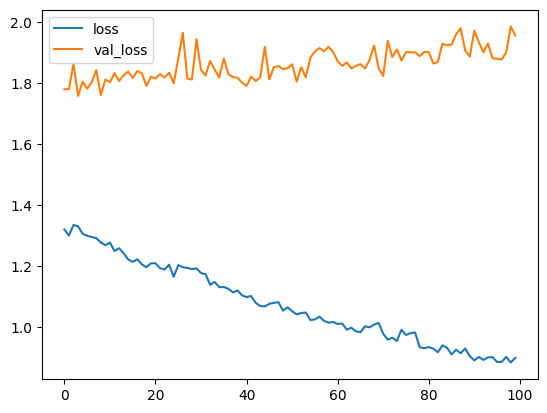

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(x_test1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


In [ ]:
y_pred.shape


(297, 8, 37)

In [ ]:
y_predd=np.argmax(y_pred,axis=2)

In [ ]:
y_predd.shape

(297, 8)

In [ ]:
model.evaluate(x_test1,y_test1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5113 - loss: 2.3614


[2.371004819869995, 0.5189393758773804]